In [6]:
using Plots

In [7]:
type Star
    id::Int
    m::Float64
    x::Array{Float64}
    xdot::Array{Float64}
    xddot::Array{Float64}
    r::Float64
    exists::Bool
end

In [8]:
function calc_acceleration!(stars)
    for star in stars
        if star.exists
            star.xddot = zeros(Float64, length(star.xddot))
            for star2 in stars
                if star.id != star2.id && star2.exists
                    star.xddot += G*star2.m/(+)(((star.x - star2.x).^2)...)^(3/2)*(star2.x - star.x)
                end
            end
        end
    end
end

calc_acceleration! (generic function with 1 method)

In [9]:
function move!(stars, dt)
    for star in stars
        if star.exists
            star.x += star.xdot * dt
            star.xdot += star.xddot * dt
        end
    end
end

move! (generic function with 1 method)

In [107]:
function step!(stars, dt, steps)
    dim = length(stars[1].x)
    logs = Array(Float64, steps, length(stars), 2*dim + 1)
    for i in 1:steps
        collision!(stars)
        calc_acceleration!(stars)
        move!(stars, dt)
        for j in 1:length(stars)
            logs[i, j, 1:dim] = stars[j].x
            logs[i, j, dim+1:2*dim]  = stars[j].xdot
            logs[i, j, end]  = stars[j].m
        end
    end
    return logs
end

step! (generic function with 1 method)

In [106]:
function collision!(stars)
    dim = length(stars[1].x)
    for star1 in stars
        for star2 in stars
            if star1.id < star2.id && (+)(((star1.x - star2.x).^2)...) < (star1.r + star2.r)^2 && star1.exists && star2.exists
                if star1.m >= star2.m
                    star2.exists = false
                    star2.xdot = zeros(Float64, dim)
                    star2.xddot = zeros(Float64, dim)
                    star1.xdot = (star1.m * star1.xdot  + star2.m * star2.xdot) / (star1.m + star2.m)
                    star1.m += star2.m
                else
                    star1.exists = false
                    star1.xdot = zeros(Float64, dim)
                    star1.xddot = zeros(Float64, dim)
                    star2.xdot = (star1.m * star1.xdot  + star2.m * star2.xdot) / (star1.m + star2.m)
                    star2.m += star1.m
                end
            end
        end
    end
end

collision! (generic function with 1 method)


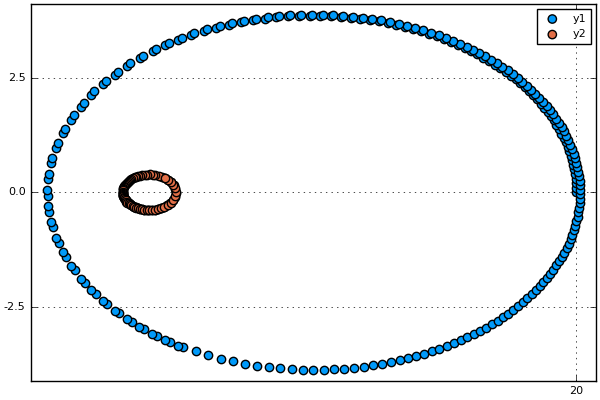

In [44]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [12, 0], [0, -0.5], [0, 0], 0.1, true)
stars = [star1, star2]
logs = step!(stars, 0.0001, 50000)
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:500:end], logs[:, 2, 2][1:500:end])


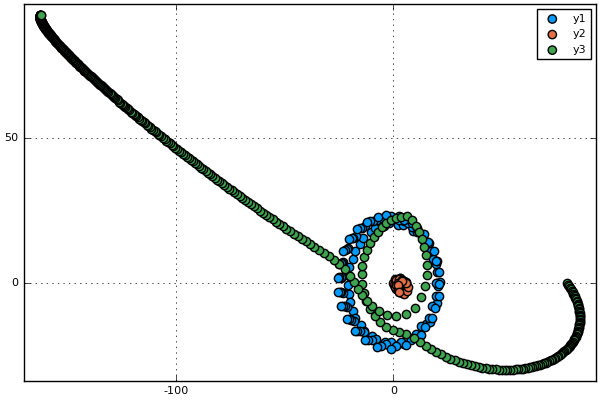

In [22]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0], 1, true)
star3 = Star(3, 0.5, [80, 0], [1, -1], [0, 0], 0.1, true)
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])


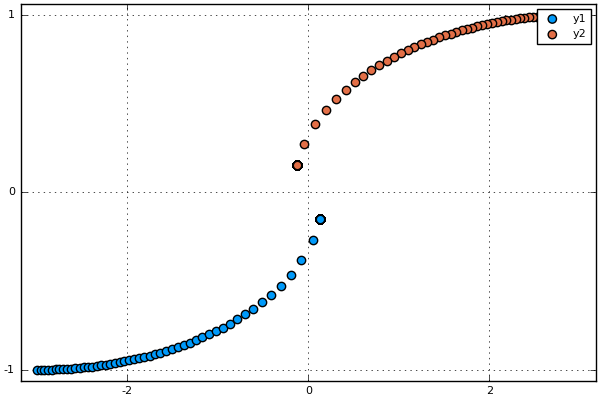

In [51]:
G = 5
star1 = Star(2, 10, [-3, -1], [2, 0], [0, 0], 0.2, true)
star2 = Star(1, 10, [3, 1], [-2, 0], [0, 0], 0.2, true)
stars = [star1, star2]
logs = step!(stars, 0.0001, 50000)
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:200:end], logs[:, 2, 2][1:200:end])


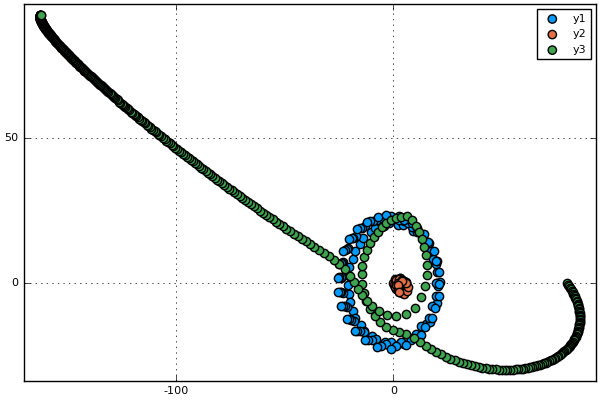

In [52]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0], 1, true)
star3 = Star(3, 0.5, [80, 0], [1, -1], [0, 0], 0.1, true)
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])

In [70]:
Star(id, m, x, xdot, xddot) = Star(id, m, x, xdot, xddot, 1, true)
Star(id, m, x, xdot, xddot, r) = Star(id, m, x, xdot, xddot, r, true)

Star


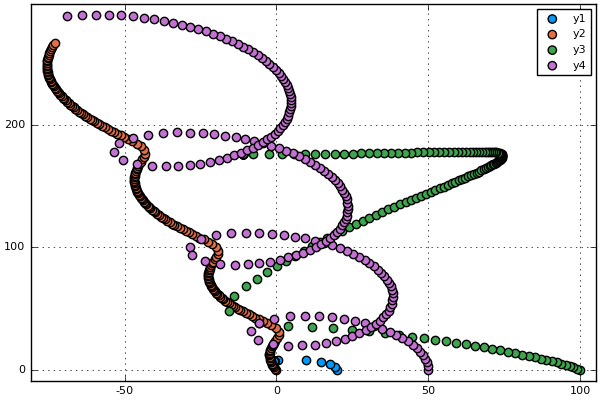

In [55]:
G = 5
star1 = Star(1, 3, [20, 0], [0, 2.3], [0, 0])
star2 = Star(2, 100, [0, 0], [-0.5, 1], [0, 0])
star3 = Star(3, 0.1, [100, 0], [-1, 1], [0, 0])
star4 = Star(4, 20, [50, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


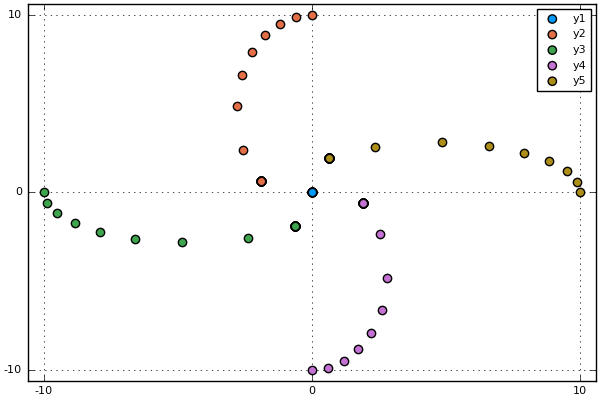

In [56]:
G = 5
star1 = Star(1, 50, [0, 0], [0, 0], [0, 0])
star2 = Star(2, 5, [0, 10], [-2, 0], [0, 0])
star3 = Star(3, 5, [-10, 0], [0, -2], [0, 0])
star4 = Star(4, 5, [0, -10], [2, 0], [0, 0])
star5 = Star(5, 5, [10, 0], [0, 2], [0, 0])
stars = [star1, star2, star3, star4, star5]
logs = step!(stars, 0.001, 25000)
scatter(logs[:, 1, 1][2:500:end], logs[:, 1, 2][2:500:end])
scatter!(logs[:, 2, 1][2:300:end], logs[:, 2, 2][2:300:end])
scatter!(logs[:, 3, 1][2:300:end], logs[:, 3, 2][2:300:end])
scatter!(logs[:, 4, 1][2:300:end], logs[:, 4, 2][2:300:end])
scatter!(logs[:, 5, 1][2:300:end], logs[:, 5, 2][2:300:end])


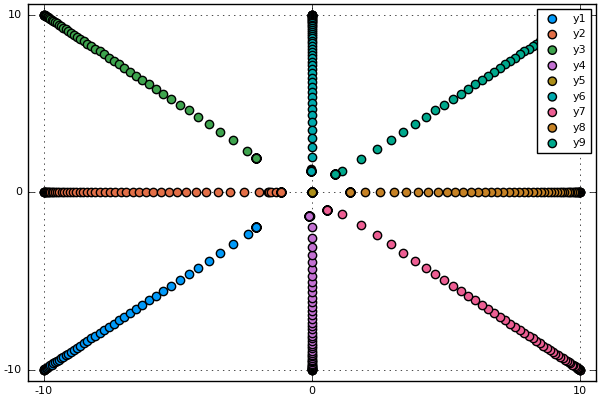

In [66]:
G = 5
m_ranges, n_ranges = -10:10:10, -10:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5, [i, j], [0, 0], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])
scatter!(logs[:, 5, 1][2:100:end], logs[:, 5, 2][2:100:end])
scatter!(logs[:, 6, 1][2:100:end], logs[:, 6, 2][2:100:end])
scatter!(logs[:, 7, 1][2:100:end], logs[:, 7, 2][2:100:end])
scatter!(logs[:, 8, 1][2:100:end], logs[:, 8, 2][2:100:end])
scatter!(logs[:, 9, 1][2:100:end], logs[:, 9, 2][2:100:end])



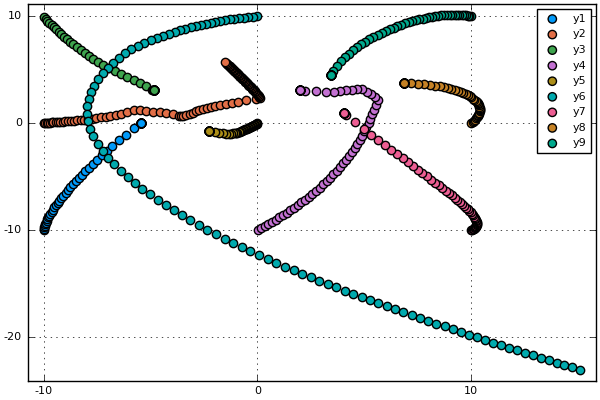

In [67]:
G = 5
m_ranges, n_ranges = -10:10:10, -10:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5, [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])
scatter!(logs[:, 5, 1][2:100:end], logs[:, 5, 2][2:100:end])
scatter!(logs[:, 6, 1][2:100:end], logs[:, 6, 2][2:100:end])
scatter!(logs[:, 7, 1][2:100:end], logs[:, 7, 2][2:100:end])
scatter!(logs[:, 8, 1][2:100:end], logs[:, 8, 2][2:100:end])
scatter!(logs[:, 9, 1][2:100:end], logs[:, 9, 2][2:100:end])



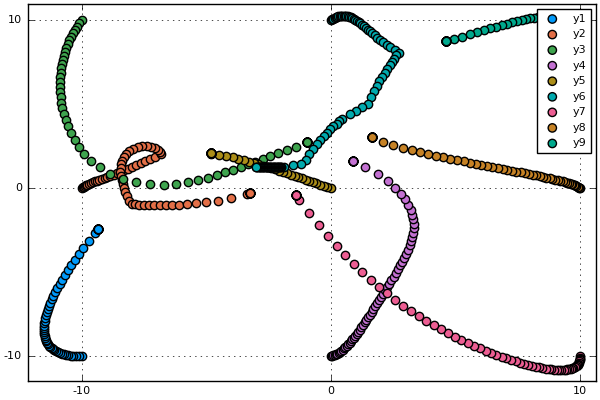

In [68]:
G = 5
m_ranges, n_ranges = -10:10:10, -10:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5, [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])
scatter!(logs[:, 5, 1][2:100:end], logs[:, 5, 2][2:100:end])
scatter!(logs[:, 6, 1][2:100:end], logs[:, 6, 2][2:100:end])
scatter!(logs[:, 7, 1][2:100:end], logs[:, 7, 2][2:100:end])
scatter!(logs[:, 8, 1][2:100:end], logs[:, 8, 2][2:100:end])
scatter!(logs[:, 9, 1][2:100:end], logs[:, 9, 2][2:100:end])


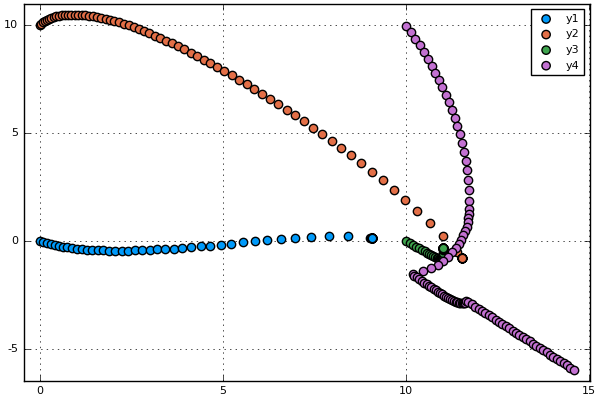

In [74]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


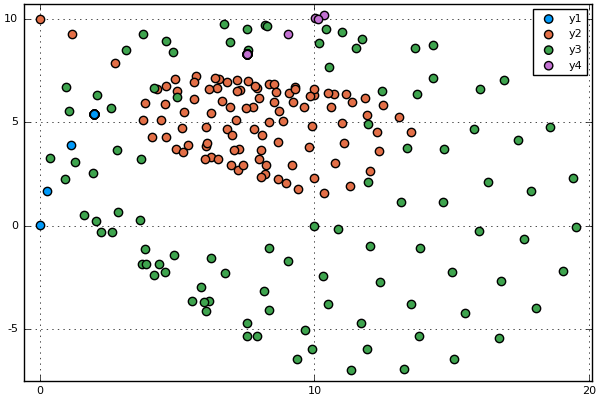

In [75]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


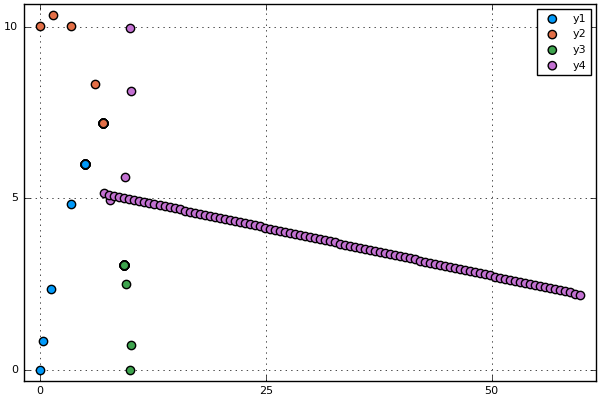

In [76]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


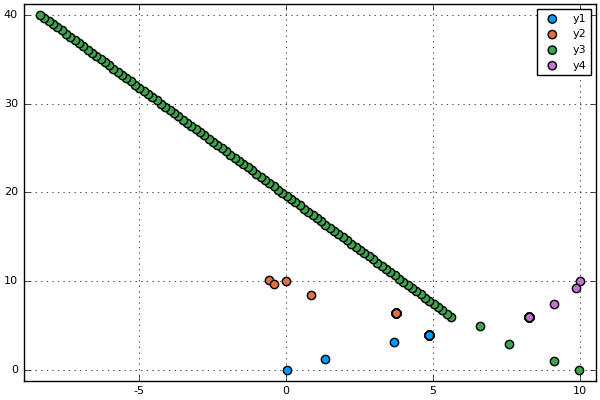

In [77]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


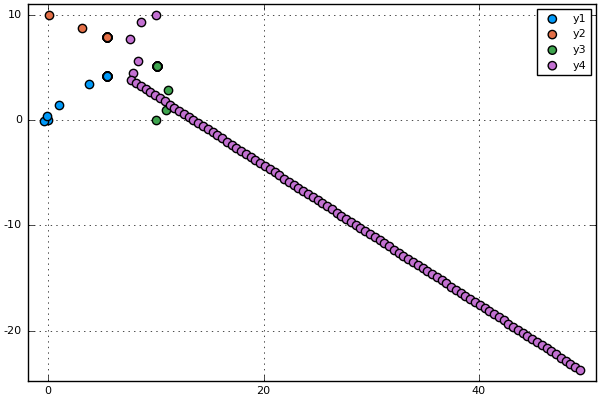

In [78]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


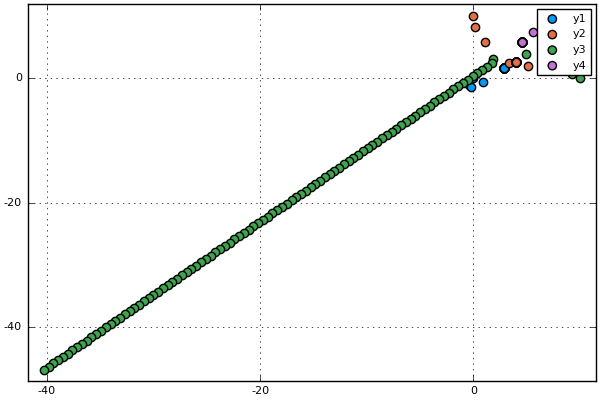

In [79]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


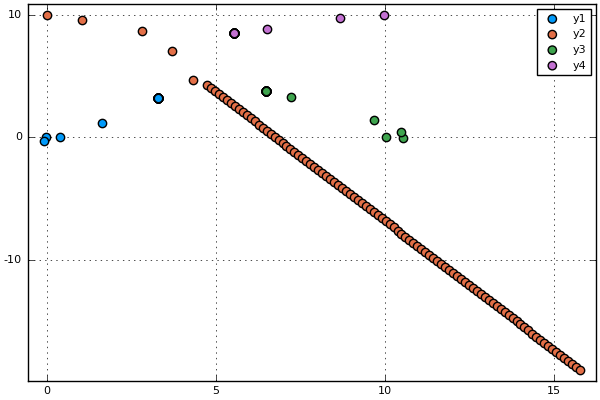

In [80]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


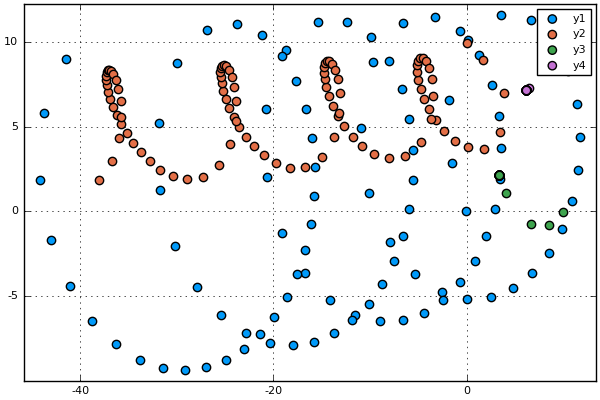

In [90]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
srand(4)
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


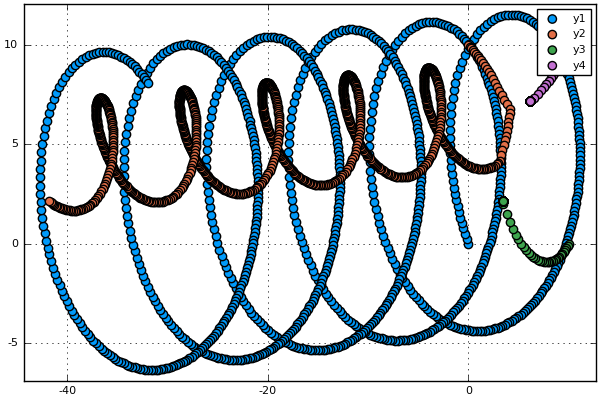

In [91]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
srand(4)
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


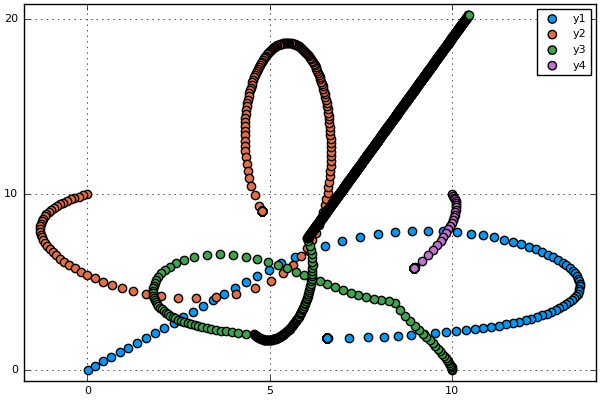

In [96]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
srand(8)
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


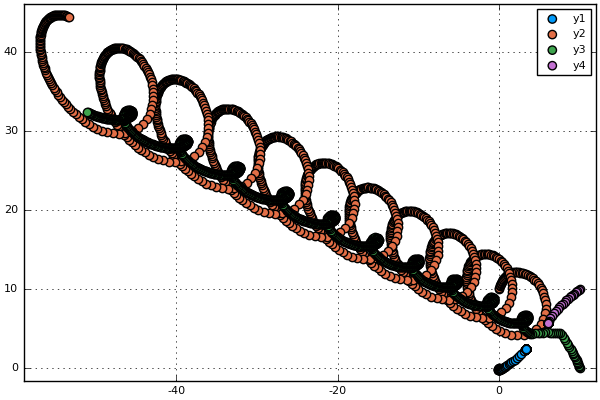

In [99]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
srand(9)
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


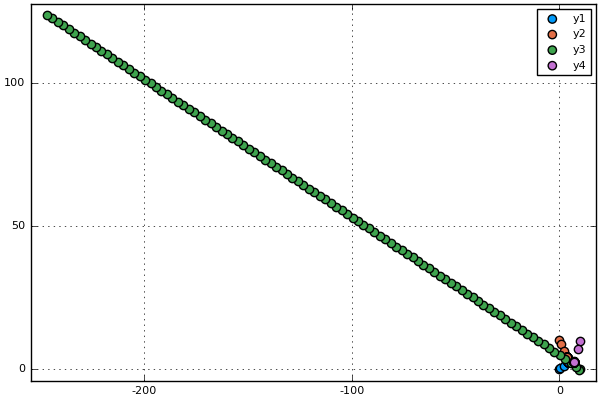

In [113]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])

In [127]:
function get_mvs(logs)
    dim = length(stars[1].x)
    num_steps = size(logs, 1)
    num_stars = size(logs, 2)
    mvs = zeros(Float64, num_steps, dim)
    for i in 1:num_steps
        for j in 1:num_stars
            mvs[i, :] += logs[i, j, dim+1:2*dim] * logs[i, j, 2*dim+1]
        end
    end
    return mvs
end

get_mvs (generic function with 1 method)


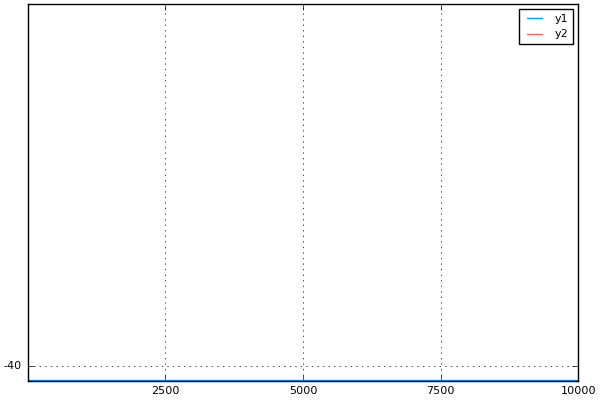

In [128]:
plot(get_mvs(logs))


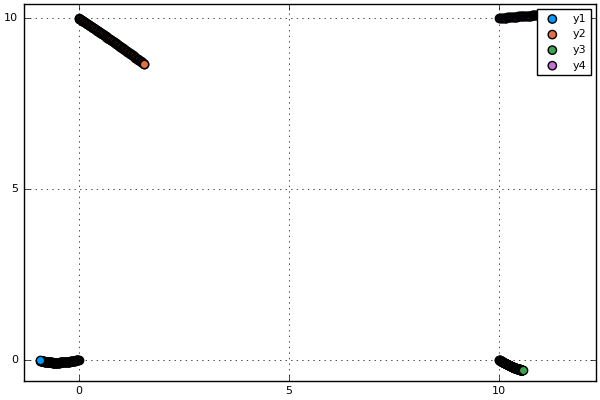

In [129]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.0001, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


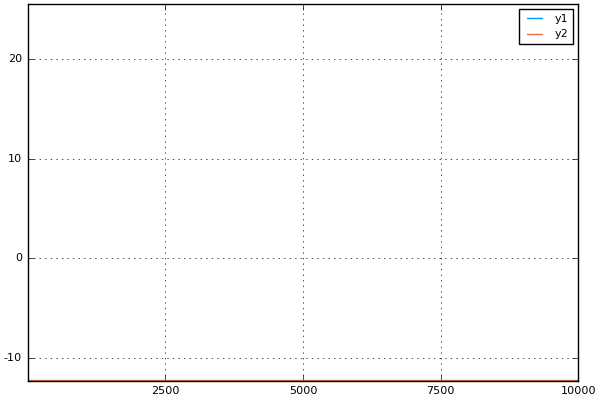

In [130]:
plot(get_mvs(logs))

In [131]:
get_mvs(logs)

10000×2 Array{Float64,2}:
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
  ⋮               
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939
 25.5652  -12.2939


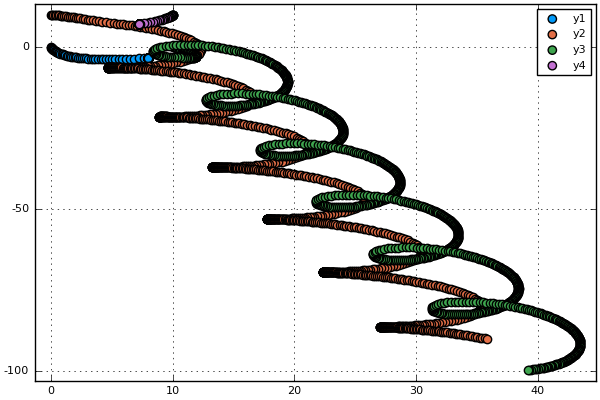

In [134]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
srand(11)
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


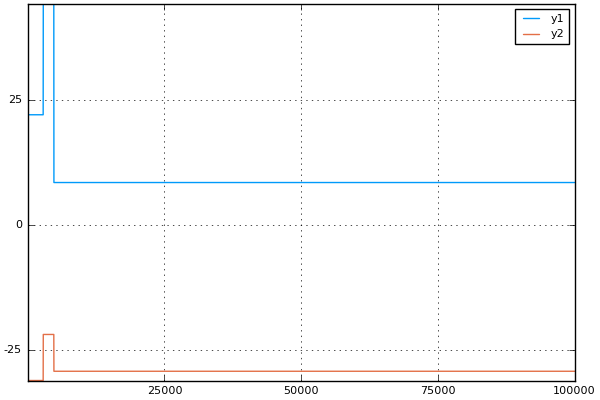

In [135]:
plot(get_mvs(logs))


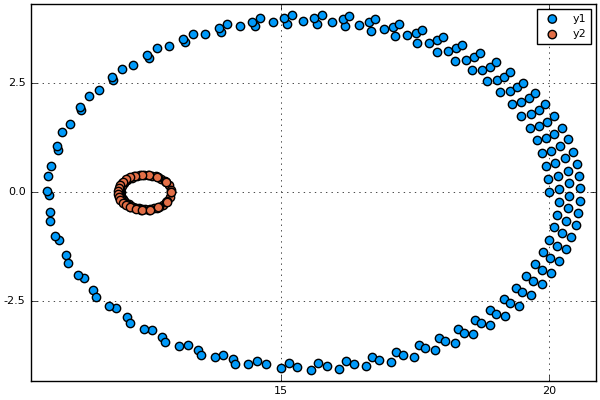

In [150]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [12, 0], [0, -0.5], [0, 0], 0.1, true)
stars = [star1, star2]
logs = step!(stars, 0.0003, 40000)
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:500:end], logs[:, 2, 2][1:500:end])

In [151]:
plt = scatter(2, xlim=(0, 30), ylim=(-5, 5))
@gif for i in 1:500:size(logs, 1)
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2])])
end

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")


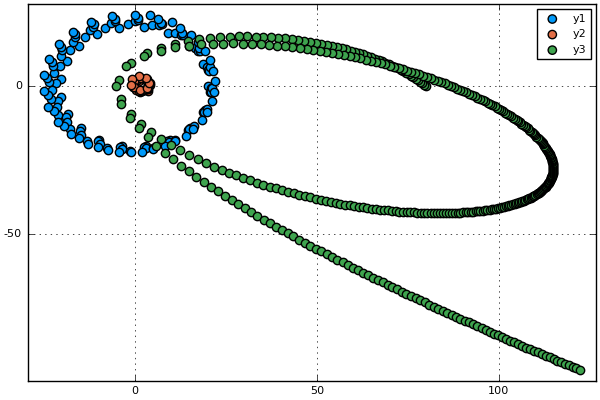

In [152]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0])
star3 = Star(3, 0.5, [80, 0], [-1, 1], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])

In [168]:
plt = scatter(3, xlim=(-50, 150), ylim=(-100, 50), marker=4)
@gif for i in 1:300:size(logs, 1)
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2]), (logs[i, 3, 1], logs[i, 3, 2])])
    end every 1

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")


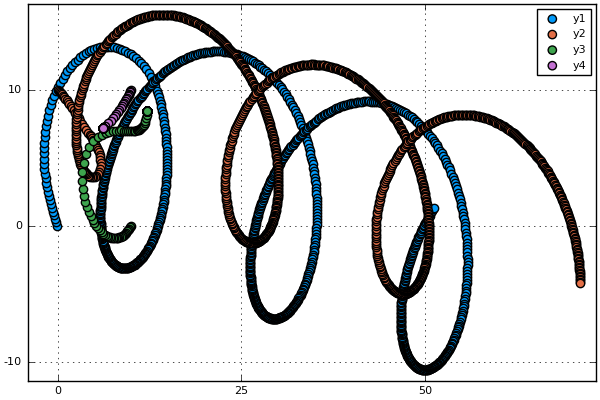

In [171]:
G = 5
m_ranges, n_ranges = 0:10:10, 0:10:10
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
srand(4)
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5*(1 + rand()), [i, j], [randn(), randn()], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])

In [175]:
plt = scatter(4, xlim=(-20, 80), ylim=(-30, 30), marker=4)
@gif for i in 1:1000:size(logs, 1)
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2]), (logs[i, 3, 1], logs[i, 3, 2]), (logs[i, 4, 1], logs[i, 4, 2])])
end every 1

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")

In [176]:
plt = scatter(4, xlim=(-20, 30), ylim=(-10, 20), marker=4)
@gif for i in 1:300:30000
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2]), (logs[i, 3, 1], logs[i, 3, 2]), (logs[i, 4, 1], logs[i, 4, 2])])
end every 1

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")


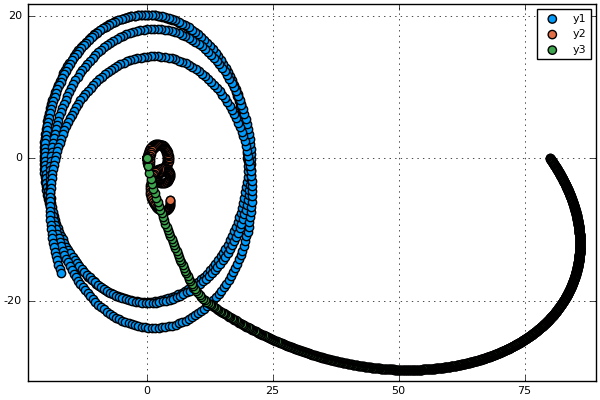

In [181]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0], 1, true)
star3 = Star(3, 0.5, [80, 0], [1, -1], [0, 0], 0.1, true)
stars = [star1, star2, star3]
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])

In [182]:
plt = scatter(3, xlim=(-20, 90), ylim=(-30, 30), marker=4)
@gif for i in 1:1000:size(logs, 1)
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2]), (logs[i, 3, 1], logs[i, 3, 2])])
end every 1

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")


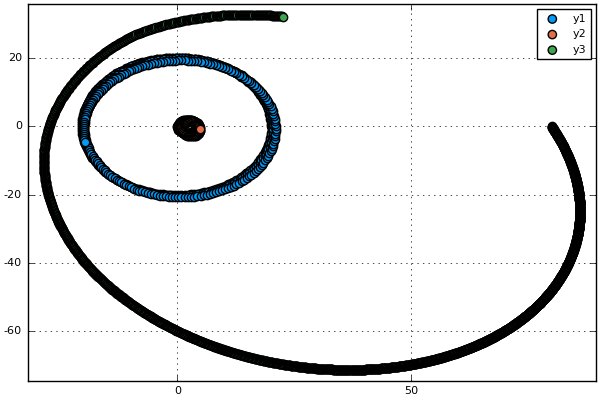

In [183]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0], 1, true)
star3 = Star(3, 0.5, [80, 0], [1, -2], [0, 0], 0.1, true)
stars = [star1, star2, star3]
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])

In [184]:
plt = scatter(3, xlim=(-20, 90), ylim=(-30, 30), marker=4)
@gif for i in 1:1000:size(logs, 1)
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2]), (logs[i, 3, 1], logs[i, 3, 2])])
end every 1

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")


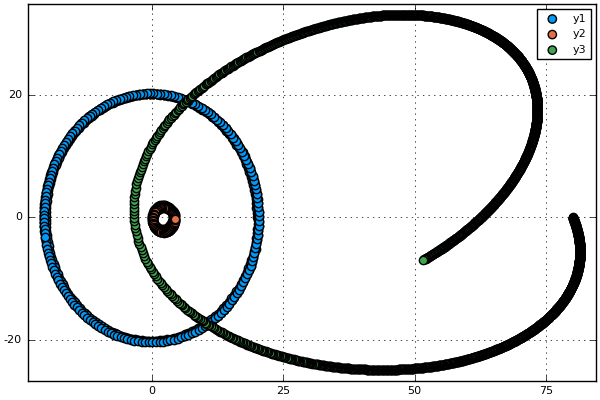

In [185]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0], 1, true)
star3 = Star(3, 0.5, [80, 0], [0.5, -1], [0, 0], 0.1, true)
stars = [star1, star2, star3]
logs = step!(stars, 0.001, 100000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])

In [186]:
plt = scatter(3, xlim=(-20, 90), ylim=(-30, 30), marker=4)
@gif for i in 1:1000:size(logs, 1)
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2]), (logs[i, 3, 1], logs[i, 3, 2])])
end every 1

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")


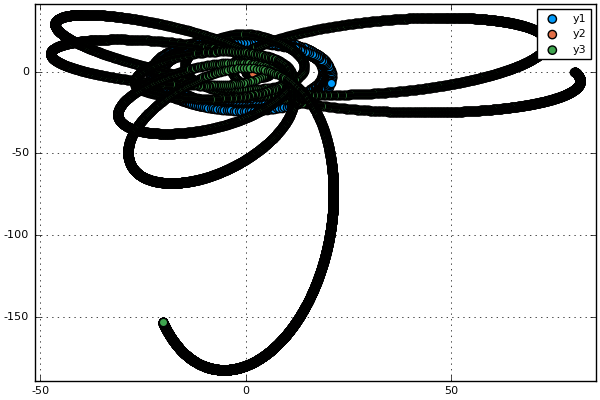

In [187]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0], 0.1, true)
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0], 1, true)
star3 = Star(3, 0.5, [80, 0], [0.5, -1], [0, 0], 0.1, true)
stars = [star1, star2, star3]
logs = step!(stars, 0.001, 500000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])


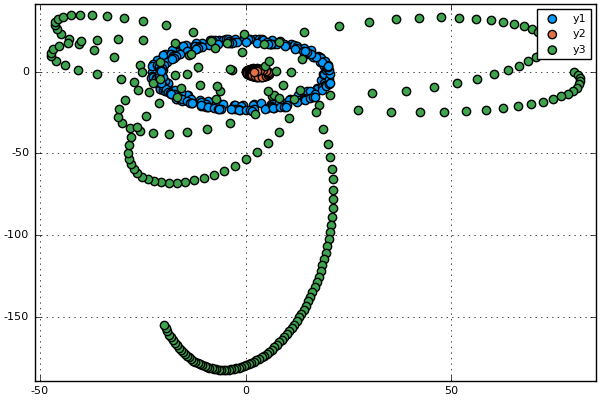

In [188]:
scatter(logs[:, 1, 1][2:2000:end], logs[:, 1, 2][2:2000:end])
scatter!(logs[:, 2, 1][2:2000:end], logs[:, 2, 2][2:2000:end])
scatter!(logs[:, 3, 1][2:2000:end], logs[:, 3, 2][2:2000:end])

In [190]:
plt = scatter(3, xlim=(-100, 100), ylim=(-200, 50), marker=4)
@gif for i in 1:2000:size(logs, 1)
    push!(plt,[(logs[i, 1, 1], logs[i, 1, 2]), (logs[i, 2, 1], logs[i, 2, 2]), (logs[i, 3, 1], logs[i, 3, 2])])
end every 1

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")